# Step1. 스티커 다운로드<br>
### 고양이 수염 스티커 다운로드<br>
- [cat-whiskers.png](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)<br>

### 패키지 불러오기<br>

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


# Step2. 얼굴검출 & 랜드마크 검출하기<br>
### 이미지 불러와서 화면에 표시하기<br>

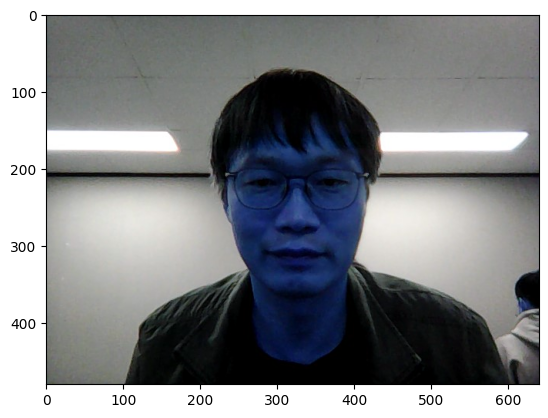

In [2]:
#cat-whiskers.png
my_image_path = '.\images\\mypicture.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

### BGR을 RGB형태로 변경하여 화면에 표시하기

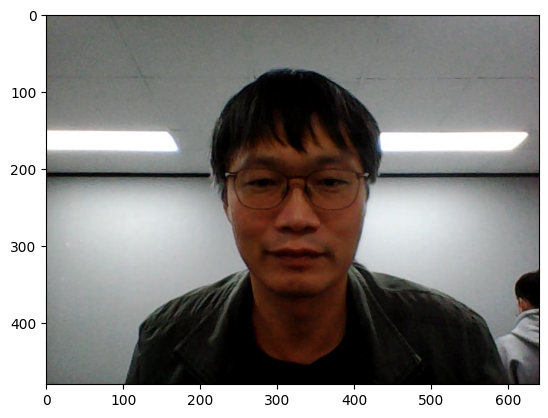

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
img_rgb.shape

(480, 640, 3)

### 얼굴영역 감지 객체 불러오기

In [5]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


### RGB이미지에서 얼굴영역 4각형 위치 정보 얻어오기

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


### 얻어온 얼굴 인식 영역 4각형으로 그려보기

rectangles[[(216, 167) (439, 390)]]


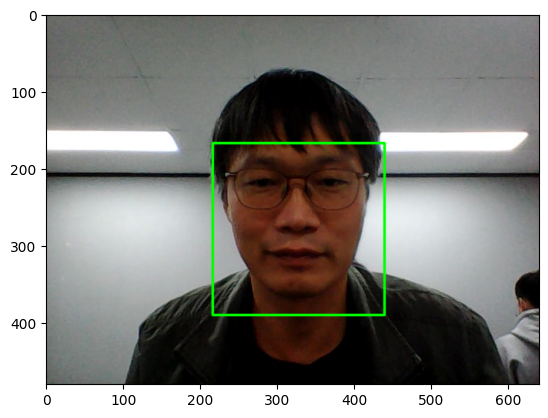

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step3. 스티커 적용위치 확인하기<br>
### 이목구비 위치 추론 객체 불러오기<br>

[landmark모델의 다운로드 위치](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2)<br>
모델을 다운로드 한 후 압축파일을 해제해 주세요

In [8]:
model_path = '.\shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


### RGB이미지와 얼굴인식 4각형 정보를 사용하여 이목구비의 위치정보 얻어오기

In [9]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


### 이목구비에 대한 face landmark의 위치를 화면에 표시해 보기

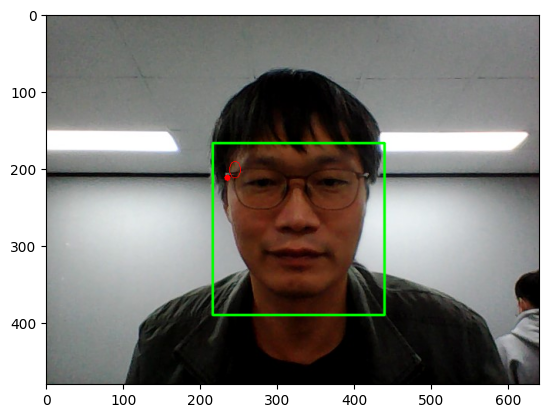

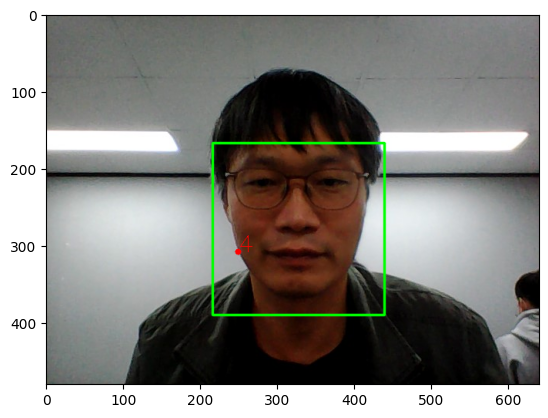

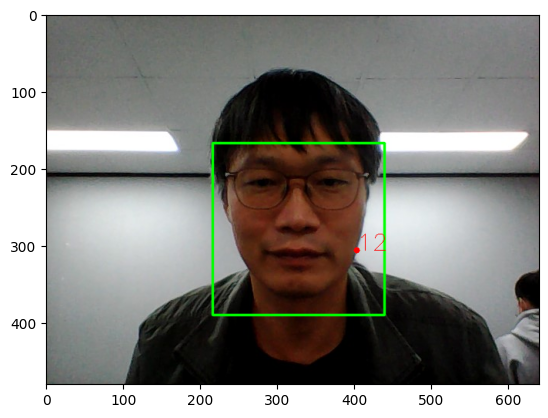

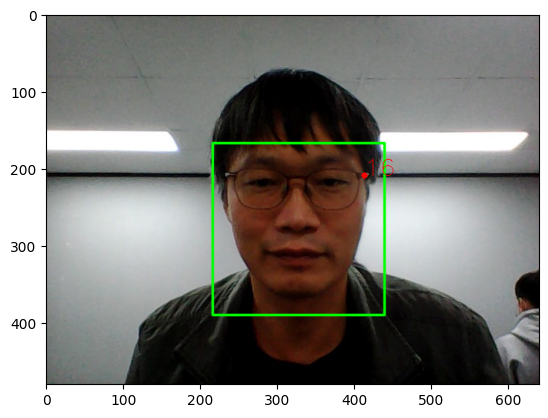

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
import time

for landmark in list_landmarks:
    count = 0
    for point in landmark:
        if count not in [0,16,4,12]:
            count +=1
            continue
        img_show_copy = img_show.copy() # img_show는 BGR 형태 원본을 복사한다.
        cv2.circle(img_show_copy, point, 4, (0, 0, 255), -1) # landmark위치에 빨간색 원을 그린다
        cv2.putText(img_show_copy,str(count), point, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255)) # landmark위치에 빨간색으로 번호를 표시한다
        count +=1
        plt.imshow(cv2.cvtColor(img_show_copy, cv2.COLOR_BGR2RGB))
        plt.show()
        del img_show_copy

# Step4. 스티커 적용하기<br>
### 스티커가 표시될 위치 사각형 박스로 그려보기<br>

In [11]:
x=list_landmarks[0][30][0]
y=list_landmarks[0][30][1]

my_sticker_rect = dlib.rectangle(x-50,y,x+50,y+100) # left,top,right,bottom

w = my_sticker_rect.width()-1
h = my_sticker_rect.width()-1
w_half = int(w/2)

print ('(x,y) : (%d,%d)'%(x,y))
print ('(w,h) : (%d,%d)'%(w,h))
print ('width half (%f):'%w_half)

(x,y) : (325,268)
(w,h) : (100,100)
width half (50.000000):


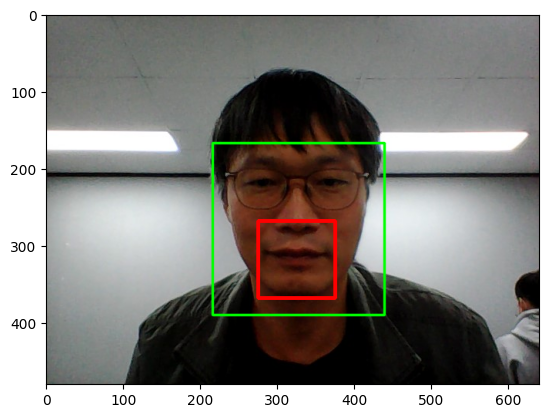

In [12]:
img_show_copy = img_show.copy()
cv2.rectangle(img_show_copy, 
              (x-w_half,y), 
              (x+w_half,y+h), 
              (0, 0, 255), 3) # img_show가 BGR순서임
plt.imshow(cv2.cvtColor(img_show_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
img_show_rgb.shape

(480, 640, 3)

### 스티커 이미지 로드 하기<br>
- 이미지가 깨지지 않게 하기위해 width, height를 동일한 크기로 resize 시킴<br>

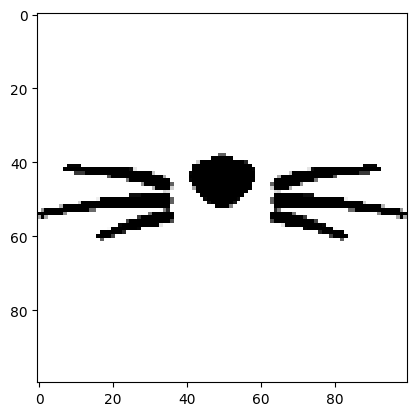

In [14]:
sticker_path = '.\images/cat-whiskers.png' # sticker 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,w)) # cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
img_sticker.shape

(100, 100, 3)

### 스티커 표시 영역 그리기(1)

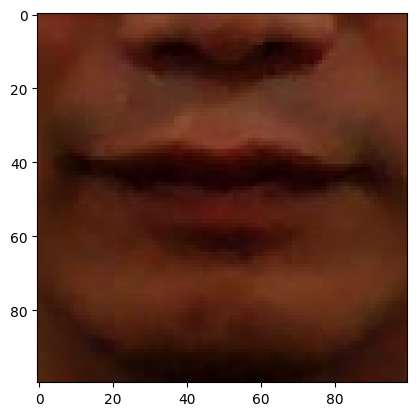

In [16]:
img_show_copy = img_show.copy()
sticker_area = img_show_copy[y:y+img_sticker.shape[0], x-w_half:x+w_half]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커가 표시될 위치 조정<br>
- 스티커가 위에 표시된 이미지 정 중앙에 그려지면 <br>
  입술과 턱 중간 지점에 고양이 수염이 자리잡기 때문에<br>
  y의 시작 위치를 위쪽으로 올려 주어야 한다<br>

In [17]:
y=y-25 # 좌표를 위쪽으로 올려준다

### 스티커 표시 영역 그리기(2)

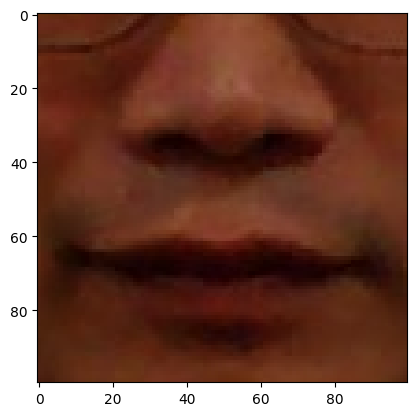

In [18]:
img_show_copy = img_show.copy()
sticker_area = img_show_copy[y:y+img_sticker.shape[0], x-w_half:x+w_half]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커 표시하기<br>
- 스티커 이미지 값이 255이면 스티커 영역의 값으로 넣고 <br>
  스티커 이미지 값이 255가 아니면 스티커 이미지 파일의 값을 넣는 방식으로 스티커를 표시한다<br>

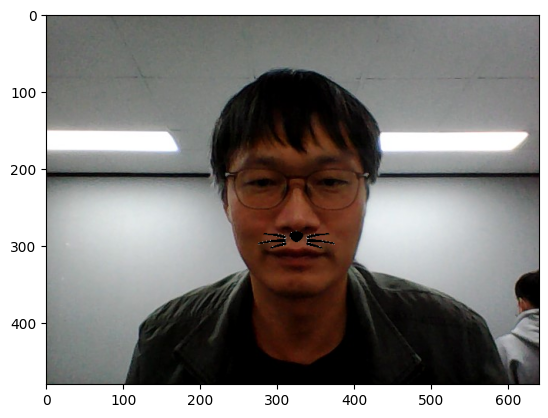

In [19]:
img_bgr_copy = img_bgr.copy()
img_bgr_copy[y:y+img_sticker.shape[0], x-w_half:x+w_half] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB))
plt.show()

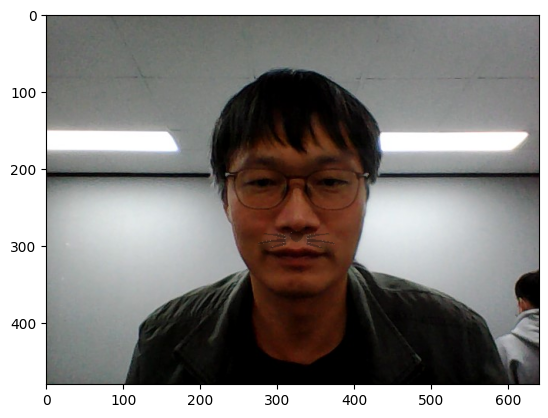

In [20]:
img_bgr_org = img_bgr.copy()
dst = cv2.addWeighted(img_bgr_copy, 0.3, img_bgr_org, 0.7, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# Step5. 문제점 찾아보기
- 다양한 각도에서 촬영한 이미지에 스티커를 적용해 본다<br>

In [21]:
def get_face_landmarks(list_landmark, img_rgb, dlib_rect):
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmark.append(list_points)

In [22]:
def load_sticker(sticker_width):
    sticker_path = '.\images/cat-whiskers.png' # sticker 이미지의 경로
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
    img_sticker = cv2.resize(img_sticker, (sticker_width,sticker_width))
    return img_sticker

In [23]:
# 점간 간격이 넓은것을 변환좌표로 사용하지 않으면 얼굴을 돌리는 부분에서 문제가 발생합니다.
# save landmark position 0,16,4,12 위치를 저장
g_prev_points=[(0,0),(0,0),(0,0),(0,0)]
def init_prev_points():
    global g_prev_points
    g_prev_points[0]=(0,0)
    g_prev_points[1]=(0,0)
    g_prev_points[2]=(0,0)
    g_prev_points[3]=(0,0)

In [24]:
# 맨 처음 좌표를 저장하는 함수
def save_prev_points(list_landmark):
    global g_prev_points
    if g_prev_points[0]==(0,0):
        g_prev_points[0]=list_landmark[0][0]
        g_prev_points[1]=list_landmark[0][16]
        g_prev_points[2]=list_landmark[0][4]
        g_prev_points[3]=list_landmark[0][12]

In [25]:
#  list_landmark에서 관심있는 좌표4개를 얻어오는 함수
def get_current_points(list_landmark):
    marks=[]
    marks.append(list_landmark[0][0])
    marks.append(list_landmark[0][16])
    marks.append(list_landmark[0][4])
    marks.append(list_landmark[0][12])
    return marks

In [26]:
# 이전 좌표와 새로운 좌표를 사용하여 img_src를 원근법 행렬에 기반하여 변환시키는 함수
def image_transform(img_src,prev_points, new_points):
    srcTri = np.float32([prev_points[0],prev_points[1],prev_points[2],prev_points[3]])
    dstTri = np.float32([new_points[0],new_points[1],new_points[2],prev_points[3]])
    warp_mat = cv2.getPerspectiveTransform(srcTri, dstTri)
    warp_dst = cv2.warpPerspective(img_src, warp_mat, (img_src.shape[1], img_src.shape[0]),borderValue=(255,255,255))
    
    
    return warp_dst

# affine 변환은 선형으로 변형되기때문에 스케일은 그대로 유지되므로 사용하지 못할것같습니다.
# def image_transform(img_src,prev_points, new_points):
#     srcTri = np.float32([prev_points[0],prev_points[1],prev_points[2]])
#     dstTri = np.float32([new_points[0],new_points[1],new_points[2]])
#     print(prev_points)
#     print(new_points)
#     warp_mat = cv2.getAffineTransform(srcTri, dstTri)
#     print(warp_mat)
#     warp_dst = cv2.warpAffine(img_src, warp_mat, (img_src.shape[0], img_src.shape[1]),borderValue=(255,255,255))
#     return warp_dst

In [27]:
def show_landmark_points_within_image(draw_img, prev_points, new_points):
    for point in prev_points:
        cv2.circle(draw_img, point, 4, (0, 255, 0), -1)# 이전 관심 landmark는 GREEN 점으로 표시
    for point in new_points:
        cv2.circle(draw_img, point, 4, (0, 0, 255), -1) # 새로운 관심 landmark는 RED 점으로 표시

In [28]:
# 얼굴 인식영역 4각형 위치정보 얻어오는 함수
def get_face_rect(img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)
    return dlib_rects[0]                            # 얼굴1개 표시된 이미지를 사용할 것이므로 1개만 처리

In [29]:
 # 얼굴 인식영역을 4각형으로 표시하는 함수
def show_face_detect_region_within_image(img_bgr,dlib_rect):
    cv2.rectangle(img_bgr, (dlib_rect.left(),dlib_rect.top()), 
                  (dlib_rect.right(),dlib_rect.bottom()), 
                  (0,255,0), 2, lineType=cv2.LINE_AA) 

### 다양한 각도에서 촬영된 이미지에 스티커를 적용하는 경우 문제점
- 정면에서 측면으로 이동할 수록 스티커의 모양이 자연스럽지 못하는 문제가 발생합니다.<br>
- 이를 해결하기 위해 image_transform()함수를 구현하여 아래와 같이 테스트 해보았습니다.<br>
  이전 landmark 0,16,4,12 번째 좌표와 새로운 landmark 0,16,4,12 번째 좌표를 이용하여<br>
  getPerspectiveTransform()으로 변환행렬을 얻은 후 warpPerspective() 함수로 이미지를<br>
  변형시키는 방식으로 처리하였고 특히, landmark 점 간 간격이 멀리 떨어진 위치에 있는 점을<br>
  선택해야 옆으로 틀어진 이미지에서도 잘 표현이 되는것을 확인 할 수 있었습니다.<br>

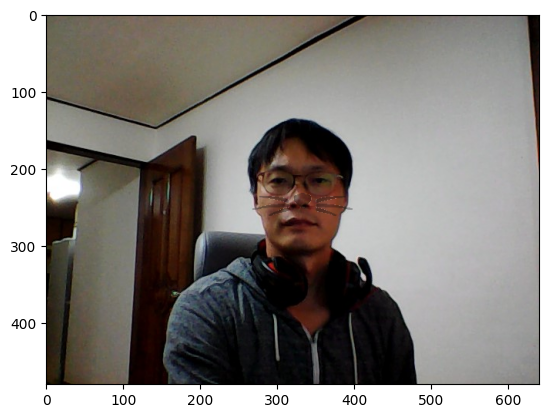

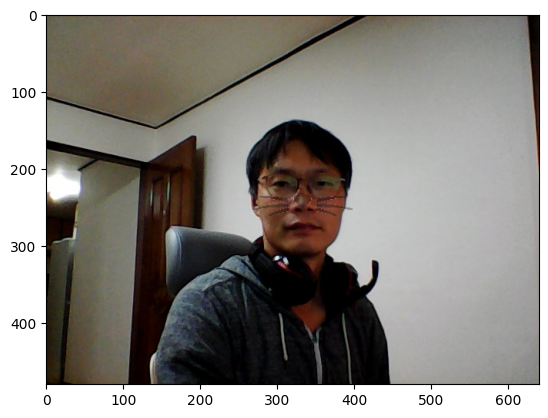

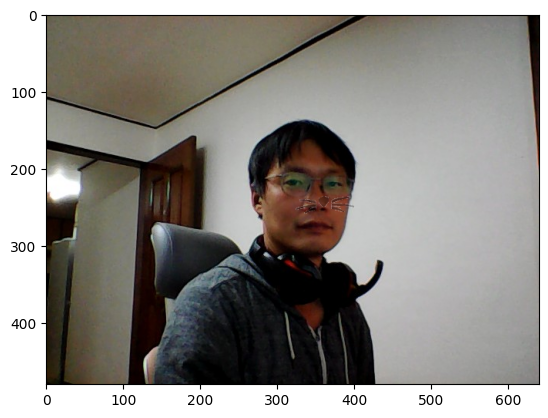

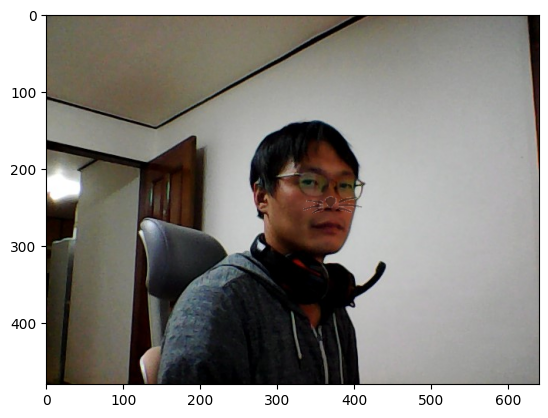

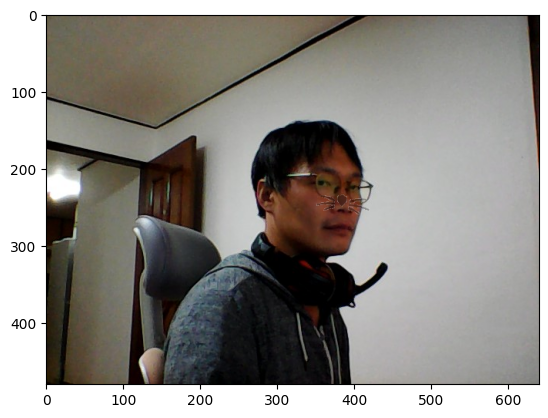

In [30]:
# 다양한 각도에서 촬영한 이미지 6장 으로 테스트
init_prev_points() # 이전좌표 저장하는 변수값을 초기화시킨다.

for i in range(5,0,-1):
    # 이미지를 읽어온다. 5,4,3,2,1,0 순으로, 정면-->측면으로 진행되는 사진 순서
    img_path = '.\images\\'+str(i)+'.jpg'
    img_bgr  = cv2.imread(img_path)
    
    
    # 얼굴인식된 4각형 영역을 얻어온다.
    dlib_rect = get_face_rect(img_bgr)

    # 얼굴인식된 영역의 width() 크기로  가로세로 동일하게 스티커이미지를 고정시킨다
    img_sticker = load_sticker(dlib_rect.width())
    
    landmarks = []
    # 인식된 영역에서 얼굴의 landmark 정보를 리스트로 얻어온다
    get_face_landmarks(landmarks, img_rgb, dlib_rect)
    
    # 얻어온 landmark정보 중에서 transform에 필요한 관심있는 점의 위치만 저장한다.
    save_prev_points(landmarks) # g_prev_point에 저장됨, 내부적으로 1번만 수행됨

    # landmarks 정보 중에서 transform에 필요한 관심있는 점의 위치만 리스트로 가져온다
    cur_points = get_current_points(landmarks)
  
    # 전체이미지 영역과 같은 크기의 255로 초기화된 배열 생성
    img_255_with_sticker = np.full(shape=img_show.shape,fill_value=255,dtype=np.uint8)
    
    # img_255_with_sticker 전체 이미지 중에서 얼굴인식된 사각형영역에 img_sticker를 붙여넣는다.
    img_255_with_sticker[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                         dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]] = img_sticker
    
    # img_255_with_sticker 이미지를 g_prev_points와 cur_points 로 transform시킴
    affined_img = image_transform(img_255_with_sticker,g_prev_points, cur_points)
    
    #1번: 변환된 이미지에서 img_sticker가 표시된 영역만 가져온다
    crop_affined_area = affined_img[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                                    dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]]
    
    #2번: 원본 이미지에서 나중에 img_sticker가 표시 되어질 영역만 가져온다
    img_bgr_copy = img_bgr.copy()
    crop_sticker_area = img_bgr_copy[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                                    dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]]
    

    #1번 변환된 이미지의 값이 (255,255,255)이면 2번 원본이미지의 값을 적용하고
    #1번 변환된 이미지의 값이 (255,255,255)가 이니면 1번 변환된 이미지의 값을
    # img_sticker 가 표시될 영격에 적용시킨다.
    img_bgr_copy[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                                    dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]] = \
    np.where(crop_affined_area==255,crop_sticker_area,crop_affined_area).astype(np.uint8)
    
    # 3:7의 비율로 스티커을 흐리게 표시한다
    draw_img = cv2.addWeighted(img_bgr_copy, 0.3, img_bgr.copy(), 0.7, 0)
    
    # 얼굴인식된 영역 draw_img에 표시함
    #show_face_detect_region_within_image(draw_img,dlib_rect)
    # transform에 필요한 landmark 점만 draw_img에 표시함
    #show_landmark_points_within_image(draw_img, g_prev_points, cur_points)
    
    plt.imshow(cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)) 
    plt.show()

### 옆으로 누워서 촬영 한 이미지 문제점
- 얼굴 영역 감지기 (dlib.get_frontal_face_detector())가 정상적으로 얼굴영역을 탐지하지 못하네요<br>
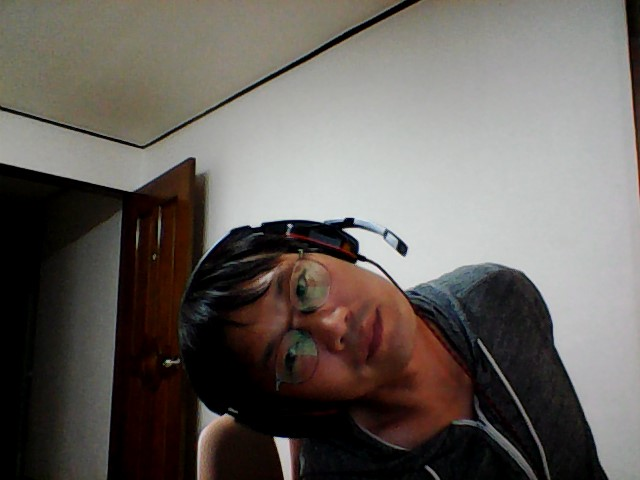

In [31]:
# 옆으로 누워서 찍은 이미지
img_path = '.\images\\lying_down.jpg'
img_bgr = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
if len(dlib_rects)<1:
    print(img_path+' face detect error')

.\images\lying_down.jpg face detect error


### 멀리서  촬영 한 이미지의 문제점
- 얼굴이 작아서 landmark가 틀어진 상태로 인식되므로 당연히 그려지는 위치에 오차가 많이 생기게 되는것 같습니다<br>

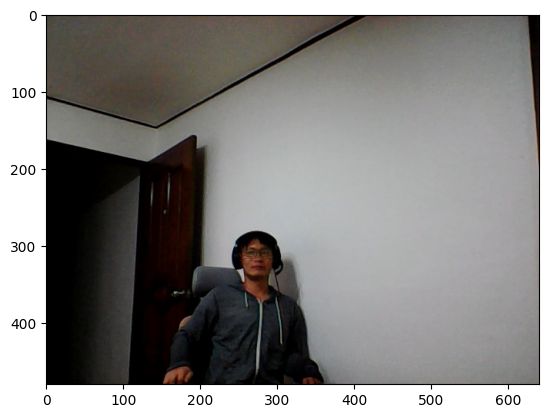

In [32]:
#  멀리서 촬영한 이미지 테스트
init_prev_points() # 이전좌표 저장하는 변수값을 초기화시킨다.

img_path = '.\images\\far.jpg'
img_bgr  = cv2.imread(img_path)


# 얼굴인식된 4각형 영역을 얻어온다.
dlib_rect = get_face_rect(img_bgr)

# 얼굴인식된 영역의 width() 크기로  가로세로 동일하게 스티커이미지를 고정시킨다
img_sticker = load_sticker(dlib_rect.width())

landmarks = []
# 인식된 영역에서 얼굴의 landmark 정보를 리스트로 얻어온다
get_face_landmarks(landmarks, img_rgb, dlib_rect)

# 얻어온 landmark정보 중에서 transform에 필요한 관심있는 점의 위치만 저장한다.
save_prev_points(landmarks) # g_prev_point에 저장됨, 내부적으로 1번만 수행됨

# landmarks 정보 중에서 transform에 필요한 관심있는 점의 위치만 리스트로 가져온다
cur_points = get_current_points(landmarks)

# 전체이미지 영역과 같은 크기의 255로 초기화된 배열 생성
img_255_with_sticker = np.full(shape=img_show.shape,fill_value=255,dtype=np.uint8)

# img_255_with_sticker 전체 이미지 중에서 얼굴인식된 사각형영역에 img_sticker를 붙여넣는다.
img_255_with_sticker[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                     dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]] = img_sticker

# img_255_with_sticker 이미지를 g_prev_points와 cur_points 로 transform시킴
affined_img = image_transform(img_255_with_sticker,g_prev_points, cur_points)

#1번: 변환된 이미지에서 img_sticker가 표시된 영역만 가져온다
crop_affined_area = affined_img[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                                dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]]

#2번: 원본 이미지에서 나중에 img_sticker가 표시 되어질 영역만 가져온다
img_bgr_copy = img_bgr.copy()
crop_sticker_area = img_bgr_copy[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                                dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]]


#1번 변환된 이미지의 값이 (255,255,255)이면 2번 원본이미지의 값을 적용하고
#1번 변환된 이미지의 값이 (255,255,255)가 이니면 1번 변환된 이미지의 값을
# img_sticker 가 표시될 영격에 적용시킨다.
img_bgr_copy[dlib_rect.top():dlib_rect.top()+img_sticker.shape[0],\
                                dlib_rect.left():dlib_rect.left()+img_sticker.shape[1]] = \
np.where(crop_affined_area==255,crop_sticker_area,crop_affined_area).astype(np.uint8)

# 3:7의 비율로 스티커을 흐리게 표시한다
draw_img = cv2.addWeighted(img_bgr_copy, 0.3, img_bgr.copy(), 0.7, 0)

# 얼굴인식된 영역 draw_img에 표시함
#show_face_detect_region_within_image(draw_img,dlib_rect)
# transform에 필요한 landmark 점만 draw_img에 표시함
#show_landmark_points_within_image(draw_img, g_prev_points, cur_points)

plt.imshow(cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)) 
plt.show()